In [1]:
from __future__ import division

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


In [2]:
def transmitting_links(network, p, flights, start_node):

    #Create dataframe storing airport and infection time 
    airports = sorted(network.nodes())
    inf_time = np.full((len(airports),), np.inf)
    inf_node = np.full((len(airports),), np.nan)
    infection = pd.DataFrame({"Airport":airports, "InfectionTime": inf_time, "InfectedNode": inf_node}) 
    
    #Set the infection time of first infected node:
    infection.InfectionTime[start_node] = flights.StartTime.min()
    #Loop over flights and start infection 
    for i in range(len(flights)):
        source = flights.Source[i]
        source_inf_time = infection.InfectionTime[source]
        if (source_inf_time < flights.StartTime[i]):
            random = np.random.rand()
            if random <= p:
                target = flights.Destination[i]
                target_cur_inf_time = infection.InfectionTime[target]
                target_new_inf_time = flights.EndTime[i]
                if target_new_inf_time < target_cur_inf_time:
                    infection.InfectionTime[target] = target_new_inf_time
                    infection.InfectedNode[target] = source
    return infection

In [3]:
flights = pd.read_csv("./events_US_air_traffic_GMT.txt", sep = " ")

#Read in network data
networkpath = "./aggregated_US_air_traffic_network_undir.edg"
network = nx.read_weighted_edgelist(networkpath, nodetype = int )


In [4]:
#Random start node
j = 0
start_list = []
for k in range(20):
    random = np.random.randint(len(network))
    start_list.append(random)
print(start_list)
links = {}
for i in start_list:
    transmit_links = transmitting_links(network, 0.5, flights, i)
    for j in range(len(transmit_links)):
        if np.isnan(transmit_links.InfectedNode[j]) == False:
            u = transmit_links.Airport[j]
            v = int(transmit_links.InfectedNode[j])
            if u < v: 
                if (u,v) not in links.keys():
                    links[(u,v)] = 1/20
                else:
                    links[(u,v)] += 1/20
            else:
                if (v,u) not in links.keys():
                    links[(v,u)] = 1/20
                else:
                    links[(v,u)] += 1/20
print(links)



[270, 53, 173, 278, 100, 210, 209, 114, 30, 16, 62, 6, 244, 203, 52, 159, 223, 242, 275, 221]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


{(0, 3): 0.65, (1, 3): 0.2, (2, 3): 0.15000000000000002, (3, 270): 1.0000000000000002, (3, 4): 0.2, (3, 5): 0.3, (6, 7): 1.0000000000000002, (3, 7): 0.2, (8, 24): 0.25, (9, 11): 0.3, (10, 28): 0.05, (3, 11): 0.15000000000000002, (3, 12): 0.05, (13, 24): 0.6, (14, 50): 0.05, (15, 24): 0.25, (16, 24): 0.2, (11, 17): 0.44999999999999996, (18, 31): 0.6, (19, 28): 0.2, (3, 20): 0.1, (21, 28): 0.35, (22, 25): 0.15000000000000002, (3, 23): 0.15000000000000002, (3, 24): 0.25, (24, 25): 0.2, (3, 26): 0.2, (3, 27): 0.25, (3, 28): 0.3, (29, 50): 0.05, (24, 30): 0.44999999999999996, (3, 31): 0.25, (24, 32): 0.25, (3, 33): 0.2, (3, 34): 0.2, (4, 35): 1.0000000000000002, (7, 36): 1.0000000000000002, (32, 37): 0.7000000000000001, (24, 38): 0.2, (32, 39): 0.7000000000000001, (40, 41): 0.9000000000000002, (26, 41): 0.7500000000000001, (41, 42): 1.0000000000000002, (4, 43): 0.8500000000000002, (4, 44): 1.0000000000000002, (3, 45): 0.3, (3, 46): 0.15000000000000002, (3, 47): 0.2, (3, 48): 0.2, (49, 81): 

/home/jovyan/si_animator.py:34: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  names=True
/opt/conda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7fd9df72eb00>)

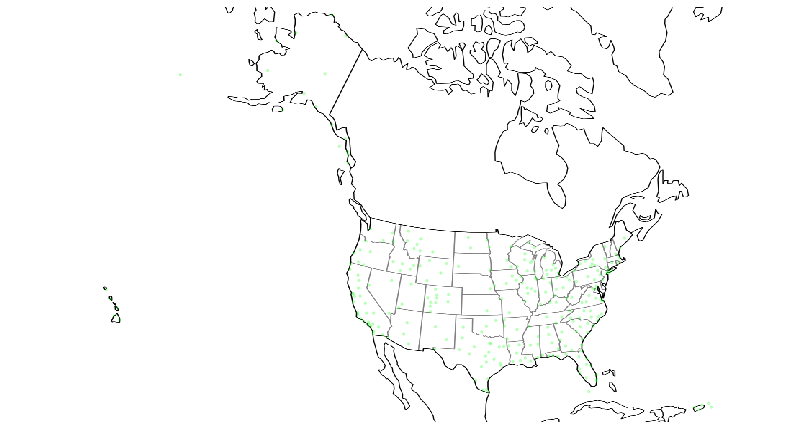

<Figure size 1440x1440 with 0 Axes>

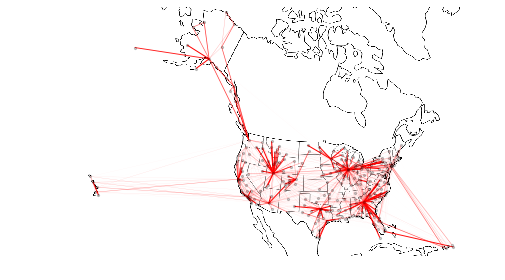

In [87]:
from si_animator import SI_AnimHelper,plot_network_usa

infection_times = np.zeros((len(network),), dtype=float)
animation = SI_AnimHelper(infection_times)
edges = []
width = []
for key,value in links.items():
    edges.append(key)
    width.append(round(value,4))
xycoord = np.column_stack((animation.xcoords,animation.ycoords))
plt.figure(figsize = (20,20))
plot_network_usa(network,xycoord,edges,width)

/opt/conda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7fd9de3c00b8>)

<Figure size 1440x1440 with 0 Axes>

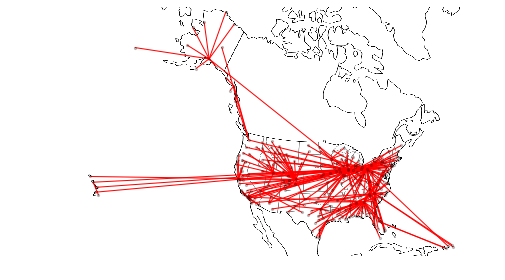

In [89]:
#Maximal spanning tree 
Tmax=nx.maximum_spanning_tree(network, weight = 'weight'*-1)
edges = list(Tmax.edges())
plt.figure(figsize = (20,20))
plot_network_usa(Tmax, xycoord, edges)


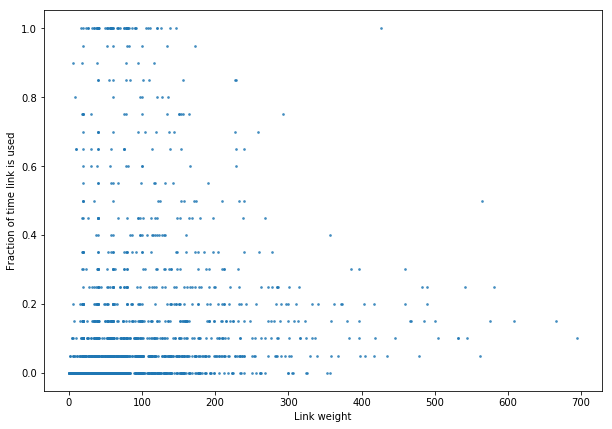

Spearman coef Link weight : SpearmanrResult(correlation=0.3361846094461893, pvalue=2.4440540118003243e-56)


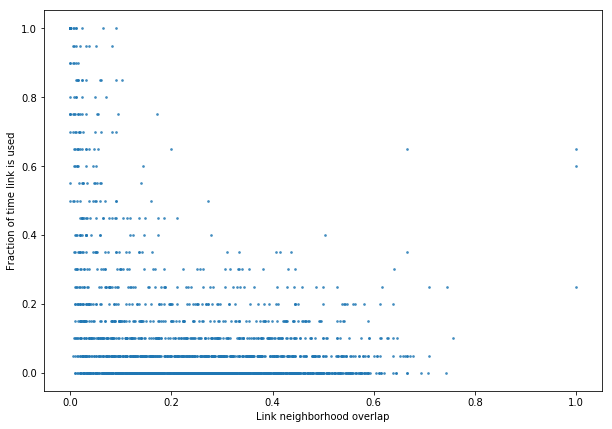

Spearman coef Link neighborhood overlap : SpearmanrResult(correlation=-0.3729324133895321, pvalue=6.859056792521477e-70)


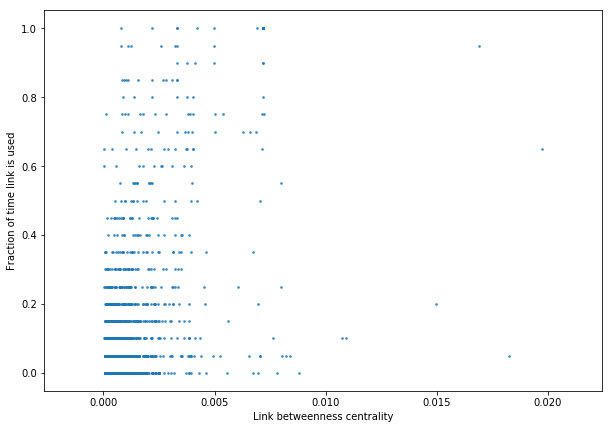

Spearman coef Link betweenness centrality : SpearmanrResult(correlation=0.4413538366105421, pvalue=2.871023785165934e-100)


In [125]:
from scipy import stats
def get_link_overlap(net):
    """
    Calculates link overlap: 
    O_ij = n_ij / [(k_i - 1) + (k_j - 1) - n_ij]

    Parameters
    -----------
    net: a networkx.Graph() object

    Returns
    --------
    overlaps: list of link overlaps in net
    """

    # TODO: write a function to calculate link neighborhood overlap
    # Hint: for getting common neighbors of two nodes, use
    # set datatype and intersection method

    overlaps = []
    # YOUR CODE HERE
    for i, j in net.edges():
        neighbors = [i for i in nx.common_neighbors(net, i, j)]
        n_ij = len(neighbors)
        if n_ij == 0:
            overlaps.append(0)
        else:
            ki = net.degree(i)
            kj = net.degree(j)
            overlaps.append(n_ij/(ki - 1 + kj - 1 - n_ij))
    return overlaps


linkweight = [w['weight'] for u,v,w in network.edges(data = True)]
neighborhood_overlap = get_link_overlap(network)
link_betweenness = nx.edge_betweenness_centrality(network)
link_betweenness_centrality = []
f_ij = []
for u,v in network.edges():
    if (u,v) in links.keys():
        f_ij.append(links[(u,v)])
    elif (v,u) in links.keys():
        f_ij.append(links[(v,u)])
    else:
        f_ij.append(0)
    link_betweenness_centrality.append(link_betweenness[(u,v)])

y_values = [linkweight, neighborhood_overlap, link_betweenness_centrality]
y_labels = ["Link weight", "Link neighborhood overlap", "Link betweenness centrality"]

for y_val, label in zip(y_values, y_labels):
    fig = plt.figure(figsize=(10,7))
    plt.scatter(y_val, f_ij, s = 3, alpha = 0.7)
    plt.xlabel(label)
    plt.ylabel("Fraction of time link is used")
    plt.show()
    spearman = stats.spearmanr(y_val, f_ij)
    print("Spearman coef " + label + " :", spearman)
